In [1]:
# IMPORTING MODULES TO BE USED
import pandas as pd
import numpy as np
import scipy
import re
import string

import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bolar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv("./Womens Clothing E-Commerce Reviews.csv")

In [3]:
df.head() # Showing the first 5 data in the dataframe

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

### Description of the dataset columns: 

###### Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
###### Age: Positive Integer variable of the reviewers age.
###### Title: String variable for the title of the review.
###### Review Text: String variable for the review body.
###### Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
###### Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
###### Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
###### Division Name: Categorical name of the product high level division.
###### Department Name: Categorical name of the product department name.
###### Class Name: Categorical name of the product class name.

In [5]:
df.describe() #Performing statistical summary of the data

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,23486.0,11742.500000,6779.968547,0.0,5871.25,11742.5,17613.75,23485.0
Clothing ID,23486.0,918.118709,203.298980,0.0,861.00,936.0,1078.00,1205.0
Age,23486.0,43.198544,12.279544,18.0,34.00,41.0,52.00,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.00,5.0,5.00,5.0
Recommended IND,23486.0,0.822362,0.382216,0.0,1.00,1.0,1.00,1.0
Positive Feedback Count,23486.0,2.535936,5.702202,0.0,0.00,1.0,3.00,122.0


In [7]:
# Getting info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [8]:
df.shape

(23486, 11)

The above infers that the original dataset has 23,486 rows and 11 columns

In [9]:
# Grouping datasets  by Ratings and getting the number of recommendation each rating has:
df.groupby(['Rating'])['Recommended IND'].count()

Rating
1      842
2     1565
3     2871
4     5077
5    13131
Name: Recommended IND, dtype: int64

In [10]:
# Grouping datasets  by Ratings and then by Recommendations and getting the number of positive and negative recommendation each rating has:
df.groupby(['Rating', 'Recommended IND'])['Recommended IND'].count()

Rating  Recommended IND
1       0                    826
        1                     16
2       0                   1471
        1                     94
3       0                   1682
        1                   1189
4       0                    168
        1                   4909
5       0                     25
        1                  13106
Name: Recommended IND, dtype: int64

### From the analysis above, it can be seen that products rated 1, 2 (low) have low recommendations while those rated high (4,5) have high recommendations

### Creating another dataFrame which includes just the needed columns

In [11]:
reviewDf = df[["Title", "Review Text", "Rating", "Recommended IND"]]

In [12]:
reviewDf.head()

,Title,Review Text,Rating,Recommended IND
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [13]:
reviewDf.tail()

,Title,Review Text,Rating,Recommended IND
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1
23485,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1


In [14]:
reviewDf.shape

(23486, 4)

In [15]:
# Checking for the sum of nall columns in each row of the new dataframe

In [16]:
reviewDf["Review Text"].isna().sum()

845

In [17]:
reviewDf["Title"].isna().sum()

3810

In [18]:
reviewDf["Rating"].isna().sum()

0

In [19]:
reviewDf["Recommended IND"].isna().sum()

0

### Combining the Title and Review Text field into one:

In [20]:
reviewDf["ReviewContent"] = reviewDf["Title"] + " " + reviewDf["Review Text"]

C:\Users\bolar\AppData\Local\Temp\ipykernel_14020\3457604872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewDf["ReviewContent"] = reviewDf["Title"] + " " + reviewDf["Review Text"]


In [21]:
reviewDf.head()

,Title,Review Text,Rating,Recommended IND,ReviewContent
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,NaN
1,NaN,Love this dress! it's sooo pretty. i happene...,5,1,NaN
2,Some major design flaws,I had such high hopes for this dress and reall...,3,0,Some major design flaws I had such high hopes ...
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,"My favorite buy! I love, love, love this jumps..."
4,Flattering shirt,This shirt is very flattering to all due to th...,5,1,Flattering shirt This shirt is very flattering...


In [22]:
# Dropping the "Review Text" and the "Title" column as it is no longer needed
reviewDf = reviewDf.drop(["Review Text", "Title"],axis=1)

In [23]:
reviewDf.head()

,Rating,Recommended IND,ReviewContent
0,4,1,NaN
1,5,1,NaN
2,3,0,Some major design flaws I had such high hopes ...
3,5,1,"My favorite buy! I love, love, love this jumps..."
4,5,1,Flattering shirt This shirt is very flattering...


In [24]:
reviewDf.isna().sum()

Rating                0
Recommended IND       0
ReviewContent      3811
dtype: int64

### Seeing that there are 3811 empty columns in the ReviewContent column, we need to drop the columns

In [25]:
reviewDf.dropna()

,Rating,Recommended IND,ReviewContent
2,3,0,Some major design flaws I had such high hopes ...
3,5,1,"My favorite buy! I love, love, love this jumps..."
4,5,1,Flattering shirt This shirt is very flattering...
5,2,0,Not for the very petite I love tracy reese dre...
6,5,1,Cagrcoal shimmer fun I aded this in my basket ...
...,...,...,...
23481,5,1,Great dress for many occasions I was very happ...
23482,3,1,Wish it was made of cotton It reminds me of ma...
23483,3,0,"Cute, but see through This fit well, but the t..."
23484,3,1,"Very cute dress, perfect for summer parties an..."


In [26]:
reviewDf.head()

,Rating,Recommended IND,ReviewContent
0,4,1,NaN
1,5,1,NaN
2,3,0,Some major design flaws I had such high hopes ...
3,5,1,"My favorite buy! I love, love, love this jumps..."
4,5,1,Flattering shirt This shirt is very flattering...


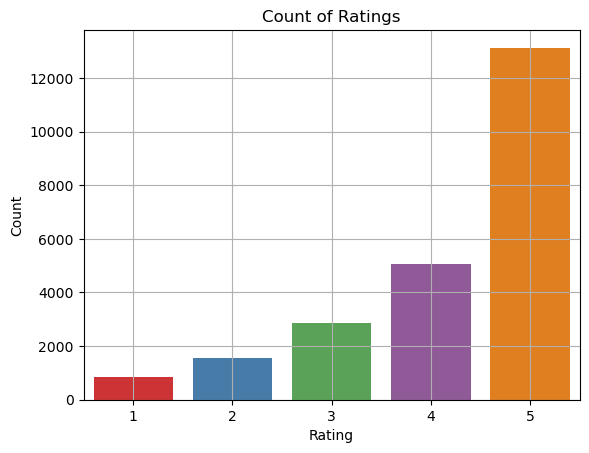

In [27]:
sns.countplot(x="Rating", data=reviewDf, palette="Set1")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Count of Ratings")
plt.grid(True)
plt.show()

In [28]:
#Renaming the field
reviewDf.rename(columns={"Recommended IND": "Recommended"})

,Rating,Recommended,ReviewContent
0,4,1,NaN
1,5,1,NaN
2,3,0,Some major design flaws I had such high hopes ...
3,5,1,"My favorite buy! I love, love, love this jumps..."
4,5,1,Flattering shirt This shirt is very flattering...
...,...,...,...
23481,5,1,Great dress for many occasions I was very happ...
23482,3,1,Wish it was made of cotton It reminds me of ma...
23483,3,0,"Cute, but see through This fit well, but the t..."
23484,3,1,"Very cute dress, perfect for summer parties an..."


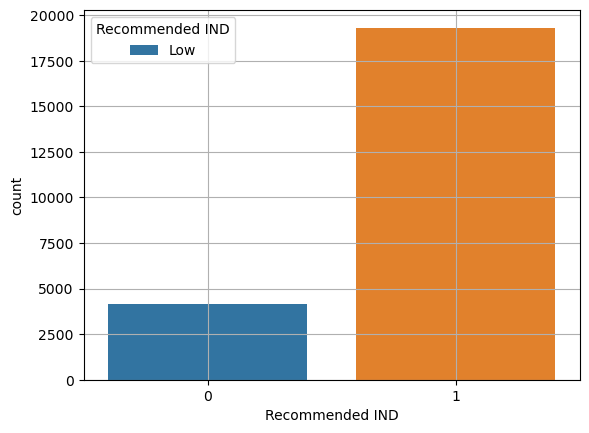

In [29]:
sns.countplot(x="Recommended IND", data=reviewDf)
plt.legend(labels=['Low', 'High'], title="Recommended IND")
plt.grid(True)
plt.show()

In [30]:
reviewDf.drop("Rating", axis=1)

,Recommended IND,ReviewContent
0,1,NaN
1,1,NaN
2,0,Some major design flaws I had such high hopes ...
3,1,"My favorite buy! I love, love, love this jumps..."
4,1,Flattering shirt This shirt is very flattering...
...,...,...
23481,1,Great dress for many occasions I was very happ...
23482,1,Wish it was made of cotton It reminds me of ma...
23483,0,"Cute, but see through This fit well, but the t..."
23484,1,"Very cute dress, perfect for summer parties an..."


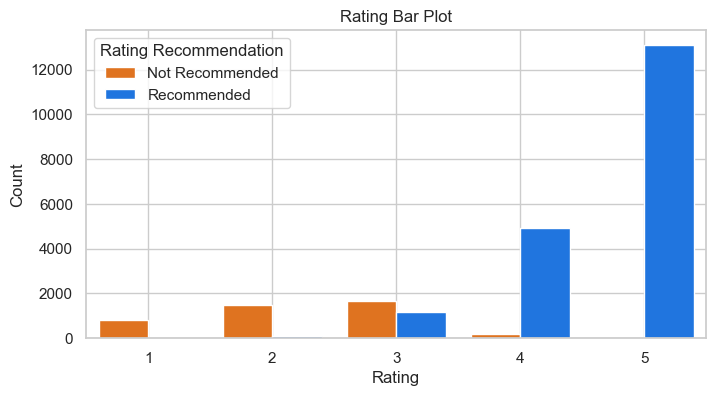

In [31]:
# Create the bar plot using seaborn showing product rating and customer recommendation.
sns.set(style='whitegrid')
plt.figure(figsize=(8, 4))
colors = ['#FF6F00', '#0072ff']
sns.countplot(x='Rating', data=reviewDf, hue='Recommended IND', palette=colors)
# Set plot title and labels
plt.title('Rating Bar Plot')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Rating Recommendation', labels=['Not Recommended', 'Recommended'])
plt.grid(True)
# Display the plot
plt.show()

# Data cleaning

In [32]:
#Removing all non alphabeths in by converting them to a whitespace " " 
def cleanText(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    word = words.lower().split()                   
    return " ".join(word)
#Converting the datatype of the ReviewContent column to string to be able to use the regex package on it:
reviewDf['ReviewContent'] = reviewDf['ReviewContent'].astype(str)
#Applying the clean text function to the ReviewContent column and saving result to another column called cleanedreview
reviewDf['CleanedReview'] = reviewDf['ReviewContent'].apply(cleanText)
reviewDf.head()

,Rating,Recommended IND,ReviewContent,CleanedReview
0,4,1,nan,nan
1,5,1,nan,nan
2,3,0,Some major design flaws I had such high hopes ...,some major design flaws i had such high hopes ...
3,5,1,"My favorite buy! I love, love, love this jumps...",my favorite buy i love love love this jumpsuit...
4,5,1,Flattering shirt This shirt is very flattering...,flattering shirt this shirt is very flattering...


In [33]:
#dropping nan values
reviewDf = reviewDf.drop(reviewDf[reviewDf['CleanedReview'] == 'nan'].index)
reviewDf.head()

,Rating,Recommended IND,ReviewContent,CleanedReview
2,3,0,Some major design flaws I had such high hopes ...,some major design flaws i had such high hopes ...
3,5,1,"My favorite buy! I love, love, love this jumps...",my favorite buy i love love love this jumpsuit...
4,5,1,Flattering shirt This shirt is very flattering...,flattering shirt this shirt is very flattering...
5,2,0,Not for the very petite I love tracy reese dre...,not for the very petite i love tracy reese dre...
6,5,1,Cagrcoal shimmer fun I aded this in my basket ...,cagrcoal shimmer fun i aded this in my basket ...


In [34]:
with pd.option_context('display.max_colwidth', None):
  display(reviewDf['CleanedReview'])

2        some major design flaws i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap net over layers imo a major design flaw was the net over layer sewn directly into the zipper it c
3                                                                                                                                                                                                                                                                                                                                                                                                 my favorite buy i love love love this jumpsuit it s fun flirty and fabulous every time i wear i

In [35]:
#Tokenization of ReviewContent
from nltk.tokenize import TweetTokenizer

In [36]:
tokenizer = TweetTokenizer()

In [37]:
reviewDf['CleanedReview'] = reviewDf['CleanedReview'].apply(tokenizer.tokenize)

In [38]:
reviewDf['CleanedReview']= [' '.join(map(str, token)) for token in reviewDf['CleanedReview']]

In [39]:
reviewDf.head()


,Rating,Recommended IND,ReviewContent,CleanedReview
2,3,0,Some major design flaws I had such high hopes ...,some major design flaws i had such high hopes ...
3,5,1,"My favorite buy! I love, love, love this jumps...",my favorite buy i love love love this jumpsuit...
4,5,1,Flattering shirt This shirt is very flattering...,flattering shirt this shirt is very flattering...
5,2,0,Not for the very petite I love tracy reese dre...,not for the very petite i love tracy reese dre...
6,5,1,Cagrcoal shimmer fun I aded this in my basket ...,cagrcoal shimmer fun i aded this in my basket ...


# Using TextBlob to determine review Polarity

In [40]:
!pip install textblob

In [41]:
conda install -c conda-forge textblob

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.7.3

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.3




In [42]:
from textblob import TextBlob

In [43]:
def getPolarity(sentence):
    return TextBlob(sentence).sentiment.polarity

reviewDf['TextBlobPolarityScore'] = reviewDf["CleanedReview"].apply(getPolarity)

In [44]:
reviewDf.head()

,Rating,Recommended IND,ReviewContent,CleanedReview,TextBlobPolarityScore
2,3,0,Some major design flaws I had such high hopes ...,some major design flaws i had such high hopes ...,0.075813
3,5,1,"My favorite buy! I love, love, love this jumps...",my favorite buy i love love love this jumpsuit...,0.500000
4,5,1,Flattering shirt This shirt is very flattering...,flattering shirt this shirt is very flattering...,0.393750
5,2,0,Not for the very petite I love tracy reese dre...,not for the very petite i love tracy reese dre...,0.181111
6,5,1,Cagrcoal shimmer fun I aded this in my basket ...,cagrcoal shimmer fun i aded this in my basket ...,0.100417


In [45]:
reviewDf.tail()

,Rating,Recommended IND,ReviewContent,CleanedReview,TextBlobPolarityScore
23481,5,1,Great dress for many occasions I was very happ...,great dress for many occasions i was very happ...,0.551905
23482,3,1,Wish it was made of cotton It reminds me of ma...,wish it was made of cotton it reminds me of ma...,0.091667
23483,3,0,"Cute, but see through This fit well, but the t...",cute but see through this fit well but the top...,0.425000
23484,3,1,"Very cute dress, perfect for summer parties an...",very cute dress perfect for summer parties and...,0.409091
23485,5,1,Please make more like this one! This dress in ...,please make more like this one this dress in a...,0.398333


In [46]:
reviewDf['CleanedReview'].head()

2    some major design flaws i had such high hopes ...
3    my favorite buy i love love love this jumpsuit...
4    flattering shirt this shirt is very flattering...
5    not for the very petite i love tracy reese dre...
6    cagrcoal shimmer fun i aded this in my basket ...
Name: CleanedReview, dtype: object

In [47]:
with pd.option_context('display.max_colwidth', None):
  display(reviewDf['CleanedReview'])

2        some major design flaws i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap net over layers imo a major design flaw was the net over layer sewn directly into the zipper it c
3                                                                                                                                                                                                                                                                                                                                                                                                 my favorite buy i love love love this jumpsuit it s fun flirty and fabulous every time i wear i

In [48]:
# Printing the first 10 reviews with negative polarity
reviewDf[reviewDf["TextBlobPolarityScore"] < 0].head(10)

,Rating,Recommended IND,ReviewContent,CleanedReview,TextBlobPolarityScore
10,3,0,Dress looks like it's made of cheap material D...,dress looks like it s made of cheap material d...,-0.022881
14,3,1,Pretty party dress with some issues This is a ...,pretty party dress with some issues this is a ...,-0.036667
22,2,0,"Not what it looks like First of all, this is n...",not what it looks like first of all this is no...,-0.058095
77,2,0,Zipper broke The zipper broke on this piece th...,zipper broke the zipper broke on this piece th...,-0.166000
78,5,1,Obsessed I usually size up with this brand. sm...,obsessed i usually size up with this brand sma...,-0.034890
84,3,1,Casual & unique tee I received this shirt in m...,casual unique tee i received this shirt in my ...,-0.020833
110,1,0,Poor quality This is so thin and poor quality....,poor quality this is so thin and poor quality ...,-0.285938
114,2,0,Disappointing quality The design/shape of the ...,disappointing quality the design shape of the ...,-0.130823
157,3,0,Australian sizing!! So disappointed that no w...,australian sizing so disappointed that no wher...,-0.050000
199,3,0,Poor quality This skirt looks exactly as pictu...,poor quality this skirt looks exactly as pictu...,-0.018750


In [49]:
#getting compound TextBlob compound score 
def convertTextBlobPolarityToCategory(score):
    if score >= 0.1:
        return 'Positive'
    elif score <= -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [50]:
reviewDf['TextBlobPolarityCategory'] = reviewDf['TextBlobPolarityScore'].apply(convertTextBlobPolarityToCategory)

In [51]:
reviewDf.head()

,Rating,Recommended IND,ReviewContent,CleanedReview,TextBlobPolarityScore,TextBlobPolarityCategory
2,3,0,Some major design flaws I had such high hopes ...,some major design flaws i had such high hopes ...,0.075813,Neutral
3,5,1,"My favorite buy! I love, love, love this jumps...",my favorite buy i love love love this jumpsuit...,0.500000,Positive
4,5,1,Flattering shirt This shirt is very flattering...,flattering shirt this shirt is very flattering...,0.393750,Positive
5,2,0,Not for the very petite I love tracy reese dre...,not for the very petite i love tracy reese dre...,0.181111,Positive
6,5,1,Cagrcoal shimmer fun I aded this in my basket ...,cagrcoal shimmer fun i aded this in my basket ...,0.100417,Positive


# Polarity score greater than 0 to 1 indicates positive polarity while those lesser than 0 to -1 indicate negative polarity

# Using Vader to determine review Polarity

In [52]:
!pip install vaderSentiment

In [53]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [54]:
def getPolarity(sentence):
    analyzer = SentimentIntensityAnalyzer()
    return analyzer.polarity_scores(sentence)['compound']

reviewDf['VaderPolarityScore'] = reviewDf["CleanedReview"].apply(getPolarity)


In [55]:
reviewDf.head()

,Rating,Recommended IND,ReviewContent,CleanedReview,TextBlobPolarityScore,TextBlobPolarityCategory,VaderPolarityScore
2,3,0,Some major design flaws I had such high hopes ...,some major design flaws i had such high hopes ...,0.075813,Neutral,0.9398
3,5,1,"My favorite buy! I love, love, love this jumps...",my favorite buy i love love love this jumpsuit...,0.500000,Positive,0.6276
4,5,1,Flattering shirt This shirt is very flattering...,flattering shirt this shirt is very flattering...,0.393750,Positive,0.9344
5,2,0,Not for the very petite I love tracy reese dre...,not for the very petite i love tracy reese dre...,0.181111,Positive,0.9431
6,5,1,Cagrcoal shimmer fun I aded this in my basket ...,cagrcoal shimmer fun i aded this in my basket ...,0.100417,Positive,0.7425


In [56]:
#getting vader compound score and using it to assign a category to the reviews

def getVaderPolarity(sentence):
    vader = SentimentIntensityAnalyzer()
    if vader.polarity_scores(sentence)['compound'] >= 0.1:
        return 'Positive'
    elif vader.polarity_scores(sentence)['compound'] <= -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [57]:
reviewDf['VaderPolarityCategory'] = reviewDf['CleanedReview'].apply(getVaderPolarity)
reviewDf.head()

,Rating,Recommended IND,ReviewContent,CleanedReview,TextBlobPolarityScore,TextBlobPolarityCategory,VaderPolarityScore,VaderPolarityCategory
2,3,0,Some major design flaws I had such high hopes ...,some major design flaws i had such high hopes ...,0.075813,Neutral,0.9398,Positive
3,5,1,"My favorite buy! I love, love, love this jumps...",my favorite buy i love love love this jumpsuit...,0.500000,Positive,0.6276,Positive
4,5,1,Flattering shirt This shirt is very flattering...,flattering shirt this shirt is very flattering...,0.393750,Positive,0.9344,Positive
5,2,0,Not for the very petite I love tracy reese dre...,not for the very petite i love tracy reese dre...,0.181111,Positive,0.9431,Positive
6,5,1,Cagrcoal shimmer fun I aded this in my basket ...,cagrcoal shimmer fun i aded this in my basket ...,0.100417,Positive,0.7425,Positive


###  where the sentiments are different ( i.e where  Textblob sentiment and Vader sentiment are not same return 0 and if they are same return 1)

([<matplotlib.patches.Wedge at 0x2a8c97554c0>,
 [Text(-0.9763836608275713, 0.5066309770128059, 'Positive'),
  Text(0.67497341810604, -0.8685682960195181, 'Negative'),
  Text(0.9991605487067559, -0.4600849898747131, 'Neutral')],
 [Text(-0.532572905905948, 0.2763441692797123, '84.8%'),
  Text(0.36816731896693083, -0.4737645251015553, '1.5%'),
  Text(0.5449966629309577, -0.2509554490225708, '13.7%')])

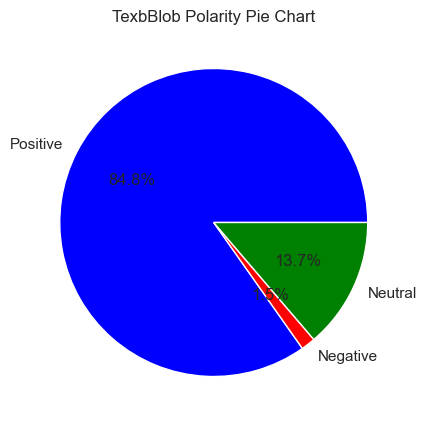

In [58]:
#Visual representation of positive, negtive, neutral for Textblob sentiment and Vader sentiment.

negative = (len(reviewDf.loc[reviewDf.TextBlobPolarityScore <-0.1,['CleanedReview']].values)/len(reviewDf))*100
positive = (len(reviewDf.loc[reviewDf.TextBlobPolarityScore >0.1,['CleanedReview']].values)/len(reviewDf))*100
neutral  = len(reviewDf.loc[reviewDf.TextBlobPolarityScore >-0.1 ,['CleanedReview']].values) - len(reviewDf.loc[reviewDf.TextBlobPolarityScore >0.1 ,['CleanedReview']].values)
neutral = neutral/len(reviewDf)*100 
plt.figure(figsize =(10, 5)) 
plt.title("TexbBlob Polarity Pie Chart")
plt.pie([positive,negative,neutral], labels = ['Positive','Negative','Neutral'] , colors = ["blue" ,"red" ,"green"], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x2a8cdbdcaf0>,
 [Text(-1.082705726689862, 0.19428924157806032, 'Positive'),
  Text(1.0727851100354442, -0.243170943342827, 'Negative'),
  Text(1.0988691520903062, -0.04986568543930235, 'Neutral')],
 [Text(-0.590566760012652, 0.10597594995166926, '94.3%'),
  Text(0.5851555145647876, -0.1326386963688147, '4.2%'),
  Text(0.5993831738674397, -0.027199464785074005, '1.4%')])

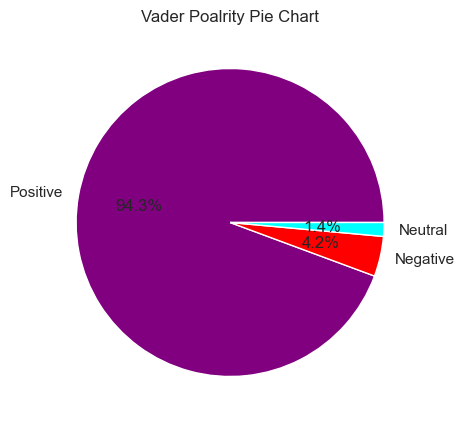

In [59]:
#Visual representation of positive, negtive, neutral for Vader sentiment.

negative = (len(reviewDf.loc[reviewDf.VaderPolarityCategory == "Negative",['CleanedReview']].values)/len(reviewDf))*100
positive = (len(reviewDf.loc[reviewDf.VaderPolarityCategory == "Positive",['CleanedReview']].values)/len(reviewDf))*100
neutral  = len(reviewDf.loc[reviewDf.VaderPolarityCategory == "Neutral" ,['CleanedReview']].values)
neutral = neutral/len(reviewDf)*100 
plt.figure(figsize =(10, 5)) 
plt.title("Vader Poalrity Pie Chart")
plt.pie([positive,negative,neutral], labels = ['Positive','Negative','Neutral'] , colors = ["purple" ,"red" ,"cyan"], autopct='%1.1f%%')

In [60]:
#Using English Stop words to clean the Data.
englishStopwords = stopwords.words("english")

In [61]:
englishStopwords[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [62]:
englishStopwords[::10]

['i',
 "you've",
 'himself',
 'they',
 'that',
 'been',
 'a',
 'while',
 'through',
 'in',
 'here',
 'few',
 'own',
 'just',
 're',
 'doesn',
 'ma',
 "shouldn't"]

In [63]:
clothingStopwords =['top', 'blowse', 'sweater','shirt',
               'skirt', 'pant','material', 'dress',  'white', 'black',
              'jeans', 'fabric', 'color','order', 'wear', 'suit', 'jacket', 'boxers', '']

In [64]:
#Creating a function to remove all of the stopwords both ENglish and clothing stopwords from the reviews
def removeStopwords(review):
    text = []
    words = review.split()
    for word in words:
        if word.lower() not in englishStopwords and word.lower() not in clothingStopwords:
            text.append(word.lower())
    return " ".join(text)

In [65]:
reviewDf["CleanedReview"] = reviewDf["CleanedReview"].apply(removeStopwords)

In [66]:
reviewDf["CleanedReview"].head(10)

2     major design flaws high hopes really wanted wo...
3     favorite buy love love love jumpsuit fun flirt...
4     flattering flattering due adjustable front tie...
5     petite love tracy reese dresses one petite fee...
6     cagrcoal shimmer fun aded basket hte last mint...
7     shimmer surprisingly goes lots ordered carbon ...
8     flattering love usually get xs runs little snu...
9     fun lbs ordered petite make sure length long t...
10    looks like made cheap runs small esp zipper ar...
12    perfect find reliant reviews written savvy sho...
Name: CleanedReview, dtype: object

In [67]:
with pd.option_context('display.max_colwidth', None):
  display(reviewDf['CleanedReview'])

2        major design flaws high hopes really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall half comfortable fit nicely bottom half tight layer several somewhat cheap net layers imo major design flaw net layer sewn directly zipper c
3                                                                                                                                                                                                                               favorite buy love love love jumpsuit fun flirty fabulous every time get nothing great compliments
4                                                                                                                                                                                                                      flattering flattering due adjustable front tie perfect length leggings sleeveless pairs well cardigan love
5                                 

In [68]:
reviewDf.head()

,Rating,Recommended IND,ReviewContent,CleanedReview,TextBlobPolarityScore,TextBlobPolarityCategory,VaderPolarityScore,VaderPolarityCategory
2,3,0,Some major design flaws I had such high hopes ...,major design flaws high hopes really wanted wo...,0.075813,Neutral,0.9398,Positive
3,5,1,"My favorite buy! I love, love, love this jumps...",favorite buy love love love jumpsuit fun flirt...,0.500000,Positive,0.6276,Positive
4,5,1,Flattering shirt This shirt is very flattering...,flattering flattering due adjustable front tie...,0.393750,Positive,0.9344,Positive
5,2,0,Not for the very petite I love tracy reese dre...,petite love tracy reese dresses one petite fee...,0.181111,Positive,0.9431,Positive
6,5,1,Cagrcoal shimmer fun I aded this in my basket ...,cagrcoal shimmer fun aded basket hte last mint...,0.100417,Positive,0.7425,Positive


# Observation up to this point: Stop words have been removed and th next step is to break words into their most basic and simplest form using Lemmatization


In [69]:
# Creating a function to lemmatize the cleaned reviews
lemmatizer = WordNetLemmatizer()
def lemmatize_review(reviews):
    # Split the review into individual words
    words = reviews.split()
    # Lemmatize each word and join them back into a sentence
    lem_text = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lem_text)

In [70]:
reviewDf["LemmatizedReview"] = reviewDf["CleanedReview"].apply(lemmatize_review)

In [71]:
with pd.option_context('display.max_colwidth', None):
  display(reviewDf['LemmatizedReview'])

2        major design flaw high hope really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
3                                                                                                                                                                                                                             favorite buy love love love jumpsuit fun flirty fabulous every time get nothing great compliment
4                                                                                                                                                                                                                     flattering flattering due adjustable front tie perfect length legging sleeveless pair well cardigan love
5                                          

In [72]:
reviewDf.head()

,Rating,Recommended IND,ReviewContent,CleanedReview,TextBlobPolarityScore,TextBlobPolarityCategory,VaderPolarityScore,VaderPolarityCategory,LemmatizedReview
2,3,0,Some major design flaws I had such high hopes ...,major design flaws high hopes really wanted wo...,0.075813,Neutral,0.9398,Positive,major design flaw high hope really wanted work...
3,5,1,"My favorite buy! I love, love, love this jumps...",favorite buy love love love jumpsuit fun flirt...,0.500000,Positive,0.6276,Positive,favorite buy love love love jumpsuit fun flirt...
4,5,1,Flattering shirt This shirt is very flattering...,flattering flattering due adjustable front tie...,0.393750,Positive,0.9344,Positive,flattering flattering due adjustable front tie...
5,2,0,Not for the very petite I love tracy reese dre...,petite love tracy reese dresses one petite fee...,0.181111,Positive,0.9431,Positive,petite love tracy reese dress one petite foot ...
6,5,1,Cagrcoal shimmer fun I aded this in my basket ...,cagrcoal shimmer fun aded basket hte last mint...,0.100417,Positive,0.7425,Positive,cagrcoal shimmer fun aded basket hte last mint...


In [73]:
from wordcloud import WordCloud

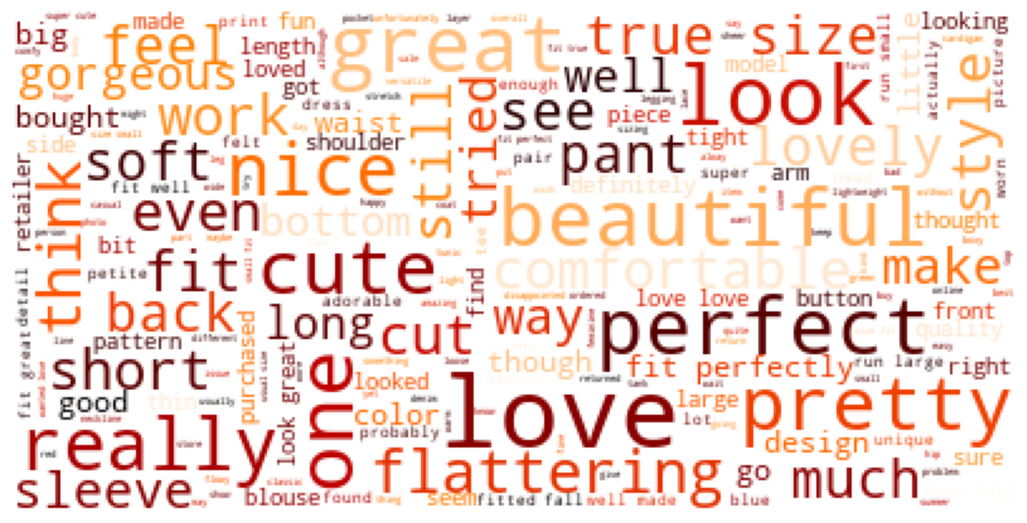

In [132]:
words = ' '.join(reviewDf["LemmatizedReview"])
#wordcloud = WordCloud().generate(words)

wordcloud = WordCloud(background_color="white",max_words=len(words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Performing Feature Extraction using CountVectorization

In [133]:
reviews = reviewDf['LemmatizedReview']

In [134]:
# Create a Vectorizer Object
vectorizer = CountVectorizer()

In [135]:
vectorized = vectorizer.fit(reviews)

In [136]:
review_counts = vectorizer.transform(reviews)

In [137]:
review_counts

<19675x12150 sparse matrix of type '<class 'numpy.int64'>'
	with 507613 stored elements in Compressed Sparse Row format>

In [138]:
[i for i in vectorized.vocabulary_.items()][5:100:5]

[('really', 8401),
 ('petite', 7656),
 ('outrageously', 7310),
 ('medium', 6465),
 ('fit', 3992),
 ('several', 9258),
 ('sewn', 9266),
 ('love', 6164),
 ('every', 3612),
 ('compliment', 2140),
 ('tie', 10819),
 ('pair', 7425),
 ('dress', 3200),
 ('brand', 1282),
 ('full', 4322),
 ('shortening', 9408),
 ('embellishment', 3429),
 ('cagrcoal', 1509),
 ('last', 5810)]

# Using TF-IDF (Term Frequency-Inverse Document Frequency) to assign weight to each word

In [139]:
tfidf_transformer = TfidfTransformer().fit(review_counts)

reviews_tfidf = tfidf_transformer.transform(review_counts)

In [140]:
reviews_tfidf

<19675x12150 sparse matrix of type '<class 'numpy.float64'>'
	with 507613 stored elements in Compressed Sparse Row format>

In [141]:
reviews_tfidf = reviews_tfidf.toarray()

In [142]:
# Converting the text to sparse matrix generated to a pandas dataframe
reviews_tfidf = pd.DataFrame(reviews_tfidf) 

In [143]:
reviews_tfidf.head(10)

,0,1,2,3,4,5,6,7,8,9,...,12140,12141,12142,12143,12144,12145,12146,12147,12148,12149
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
reviews_tfidf.shape

(19675, 12150)

Creating a new dataframe by merging the reviewDf with the new dataframe of the sparse matric¶

In [145]:
finalDf = pd.merge(reviewDf, reviews_tfidf,right_index=True, left_index=True)

In [146]:
finalDf.head()

,Rating,Recommended IND,ReviewContent,CleanedReview,TextBlobPolarityScore,TextBlobPolarityCategory,VaderPolarityScore,VaderPolarityCategory,LemmatizedReview,0,...,12140,12141,12142,12143,12144,12145,12146,12147,12148,12149
2,3,0,Some major design flaws I had such high hopes ...,major design flaws high hopes really wanted wo...,0.075813,Neutral,0.9398,Positive,major design flaw high hope really wanted work...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,1,"My favorite buy! I love, love, love this jumps...",favorite buy love love love jumpsuit fun flirt...,0.500000,Positive,0.6276,Positive,favorite buy love love love jumpsuit fun flirt...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,Flattering shirt This shirt is very flattering...,flattering flattering due adjustable front tie...,0.393750,Positive,0.9344,Positive,flattering flattering due adjustable front tie...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2,0,Not for the very petite I love tracy reese dre...,petite love tracy reese dresses one petite fee...,0.181111,Positive,0.9431,Positive,petite love tracy reese dress one petite foot ...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5,1,Cagrcoal shimmer fun I aded this in my basket ...,cagrcoal shimmer fun aded basket hte last mint...,0.100417,Positive,0.7425,Positive,cagrcoal shimmer fun aded basket hte last mint...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
finalDf = finalDf.drop("Rating", axis=1)

Dropping all the reviews columns from the dataframe

In [148]:
finalDf = finalDf.drop(['ReviewContent', 'CleanedReview', 'LemmatizedReview', 'VaderPolarityCategory', 'TextBlobPolarityCategory'], axis=1)

In [149]:
finalDf.head()

,Recommended IND,TextBlobPolarityScore,VaderPolarityScore,0,1,2,3,4,5,6,...,12140,12141,12142,12143,12144,12145,12146,12147,12148,12149
2,0,0.075813,0.9398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.500000,0.6276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.393750,0.9344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0.181111,0.9431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,0.100417,0.7425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
###

X = finalDf.drop("Recommended IND", axis=1)
y = finalDf["Recommended IND"]

In [151]:
X.shape

(16481, 12152)

In [152]:
y.shape

(16481,)

In [153]:
###
from sklearn.model_selection import train_test_split

In [154]:
seed=101
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=seed)

In [155]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

C:\Users\bolar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\bolar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\bolar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


## Dimensionality Reduction using PCA

In [156]:
pca_transformer = PCA(n_components=2).fit(X_train_s)
X_train_s_pca = pca_transformer.transform(X_train_s)
X_test_s_pca = pca_transformer.transform(X_test_s)
X_train_s_pca[:1]

array([[-0.07680805,  0.02373782]])

In [157]:
X_train_s_pca.shape

(11536, 2)

In [158]:
X_train_s = scipy.sparse.csr_matrix(X_train_s)
X_test_s = scipy.sparse.csr_matrix(X_test_s)

X_train = scipy.sparse.csr_matrix(X_train.values)
X_test = scipy.sparse.csr_matrix(X_test.values)
X_test

<4945x12152 sparse matrix of type '<class 'numpy.float64'>'
	with 136439 stored elements in Compressed Sparse Row format>

In [159]:
X_train.shape

(11536, 12152)

# Creating the Machine Learning Models

### Logistic Regression Model

In [160]:
#Logistic Regression
logRegModel = LogisticRegression(class_weight='balanced', 
                              random_state=seed,max_iter=1000)

In [161]:
logRegModel.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=101)

In [162]:
logRegPred = logRegModel.predict(X_test)

In [163]:
logRegPred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [164]:
##
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [165]:
logAccuracy = accuracy_score(y_test, logRegPred)

In [166]:
logPrecision = precision_score(y_test, logRegPred)

In [167]:
print(logRegModel.classes_)

[0 1]


In [168]:
logConfusionMatrix = confusion_matrix(y_test, logRegPred, labels=logRegModel.classes_)

In [169]:
logRegMetricsDf = pd.DataFrame({'Metric': ['Accuracy', 'Precision'],
                           'Score': [logAccuracy, logPrecision]})

In [170]:
from sklearn.metrics import classification_report

In [171]:
logRegClassificationReport = classification_report(y_true=y_test, y_pred=logRegPred)

In [172]:
print("Classification Report for the Logistic Regression Model")
print(logRegClassificationReport)

Classification Report for the Logistic Regression Model
              precision    recall  f1-score   support

           0       0.44      0.57      0.50       897
           1       0.90      0.84      0.87      4048

    accuracy                           0.79      4945
   macro avg       0.67      0.71      0.68      4945
weighted avg       0.82      0.79      0.80      4945



In [173]:
logRegMetricsDf.head()

,Metric,Score
0,Accuracy,0.790293
1,Precision,0.898808


In [174]:
print("Logistic Regression confusion matrix")
print(logConfusionMatrix)

Logistic Regression confusion matrix
[[ 515  382]
 [ 655 3393]]


### SVM Classifier Model

In [175]:
svc_model = SVC(C=1.0, 
             kernel='linear',
             class_weight='balanced', 
             probability=True,
             random_state=111)

In [176]:
svc_model.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear', probability=True,
    random_state=111)

In [177]:
svc_prediction = svc_model.predict(X_test)

In [178]:
svcConfusionMatrix = confusion_matrix(y_test, svc_prediction)

In [179]:
print("SVM Classifier confusion matrix")
print(svcConfusionMatrix)

SVM Classifier confusion matrix
[[ 493  404]
 [ 714 3334]]


In [180]:
svcClassificationReport = classification_report(y_true=y_test, y_pred=svc_prediction)

In [181]:
print("SVM Classifier Classification Report")
print(svcClassificationReport)

SVM Classifier Classification Report
              precision    recall  f1-score   support

           0       0.41      0.55      0.47       897
           1       0.89      0.82      0.86      4048

    accuracy                           0.77      4945
   macro avg       0.65      0.69      0.66      4945
weighted avg       0.80      0.77      0.79      4945



### AdaBoost Model

In [182]:
dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=555)

In [183]:
adaBoost_model = AdaBoostClassifier(base_estimator=dt, learning_rate=0.001, n_estimators=1000, random_state=222)

In [184]:
adaBoost_model.fit(X_train ,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=5,
                                                         random_state=555),
                   learning_rate=0.001, n_estimators=1000, random_state=222)

In [185]:
adaBoostPrediction = adaBoost_model.predict(X_test)

In [186]:
adaBoostConfusionMatrix = confusion_matrix(y_test, adaBoostPrediction)

In [187]:
print("AdaBoost confusion matrix")
print(adaBoostConfusionMatrix)

AdaBoost confusion matrix
[[ 554  343]
 [ 689 3359]]


In [188]:
adaBoostClassificationReport = classification_report(y_true=y_test, y_pred=adaBoostPrediction)

In [189]:
print("AdaBoost Classification Report")
print(adaBoostClassificationReport)

AdaBoost Classification Report
              precision    recall  f1-score   support

           0       0.45      0.62      0.52       897
           1       0.91      0.83      0.87      4048

    accuracy                           0.79      4945
   macro avg       0.68      0.72      0.69      4945
weighted avg       0.82      0.79      0.80      4945



## Creating visualizations from the model results

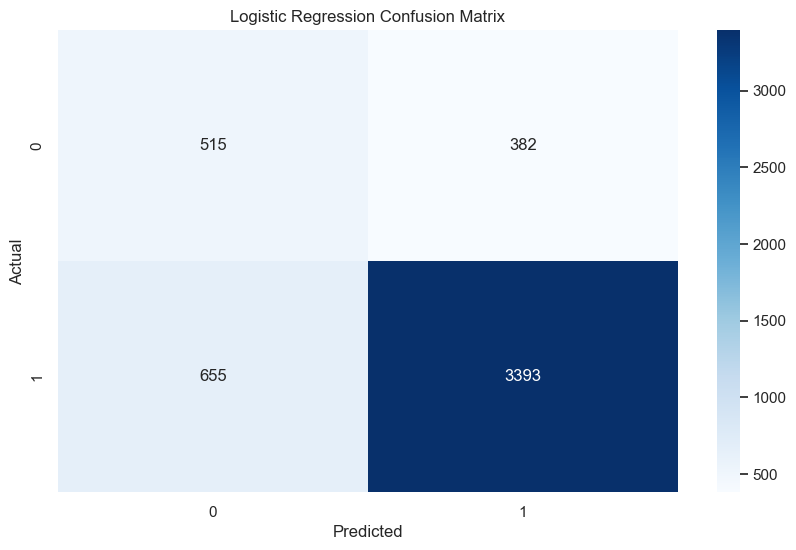

In [191]:
# Creating a confusion matrix heatmap for the logistic regression model
plt.figure(figsize=(10, 6))
sns.heatmap(logConfusionMatrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=logRegModel.classes_, yticklabels=logRegModel.classes_)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

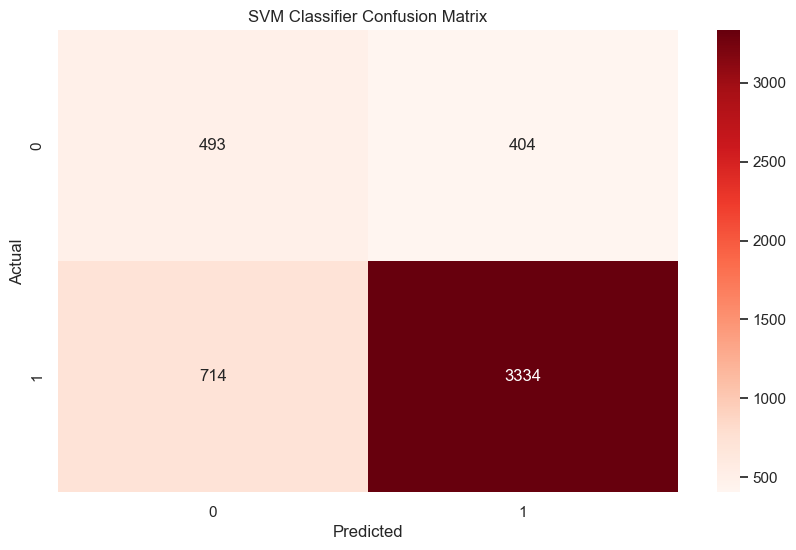

In [193]:
plt.figure(figsize=(10, 6))
sns.heatmap(svcConfusionMatrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=logRegModel.classes_, yticklabels=logRegModel.classes_)
plt.title("SVM Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

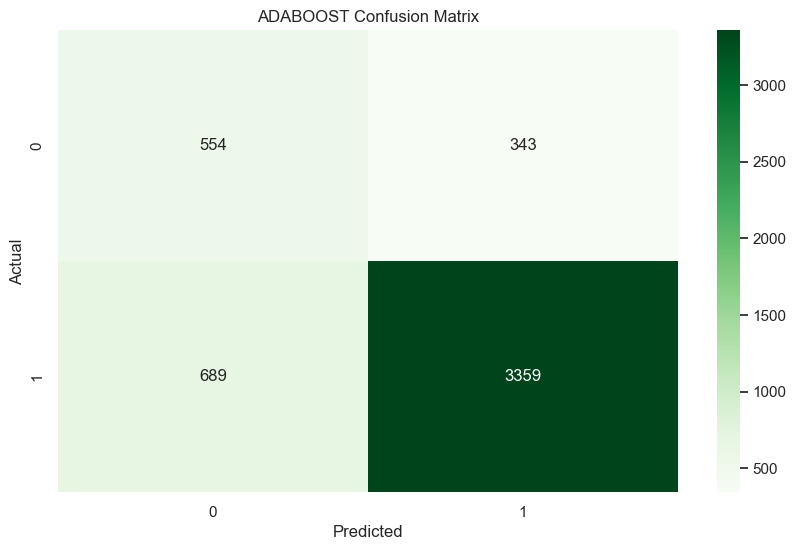

In [210]:
plt.figure(figsize=(10, 6))
sns.heatmap(adaBoostConfusionMatrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=logRegModel.classes_, yticklabels=logRegModel.classes_)
plt.title("ADABOOST Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

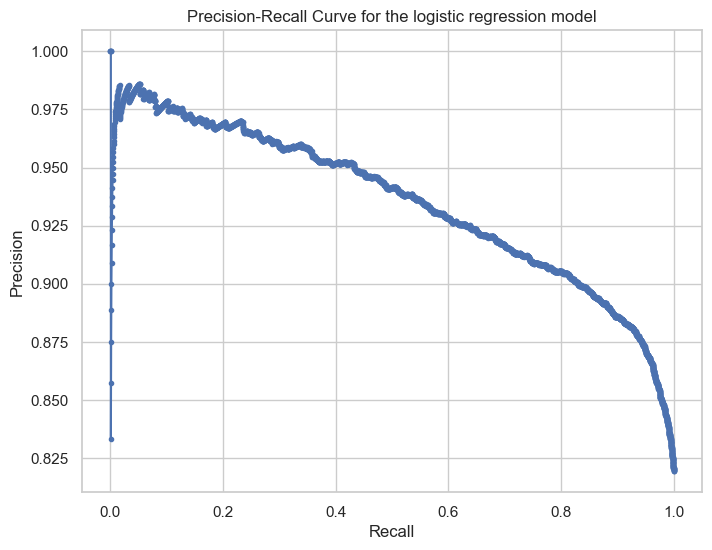

In [195]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, logRegModel.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve for the logistic regression model")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

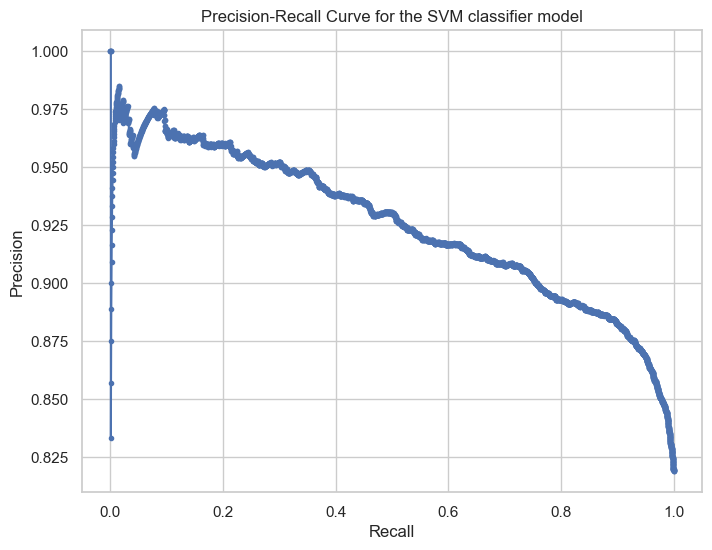

In [198]:
from sklearn.metrics import precision_recall_curve
precision_svm, recall_svm, _ = precision_recall_curve(y_test, svc_model.decision_function(X_test))

plt.figure(figsize=(8, 6))
plt.plot(recall_svm, precision_svm, marker='.')
plt.title("Precision-Recall Curve for the SVM classifier model")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

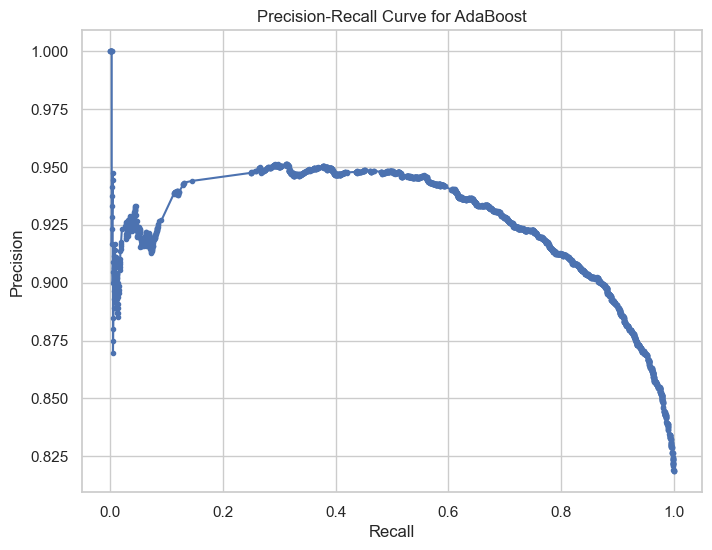

In [199]:
precision_adaboost, recall_adaboost, _ = precision_recall_curve(y_test, adaBoost_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall_adaboost, precision_adaboost, marker='.')
plt.title("Precision-Recall Curve for AdaBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

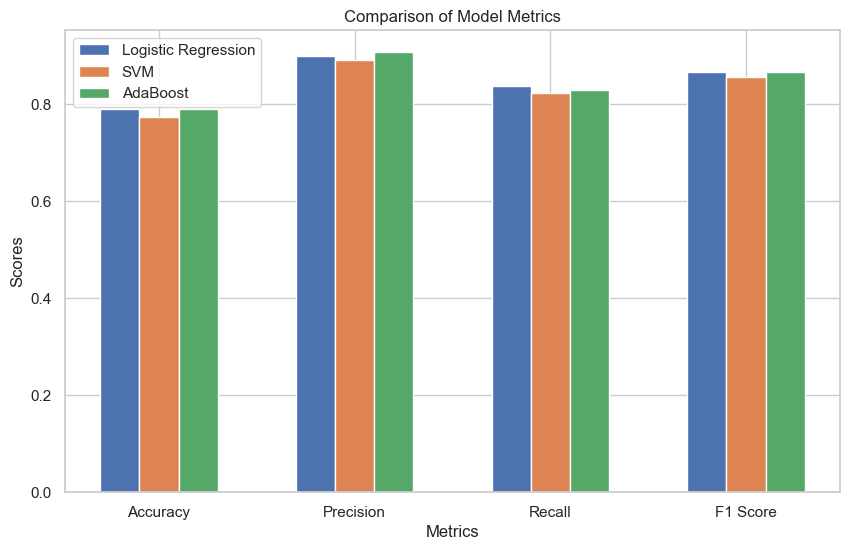

In [212]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores_logreg = [logAccuracy, logPrecision, recall_score(y_test, logRegPred), f1_score(y_test, logRegPred)]  # Add F1 score
scores_svc = [accuracy_score(y_test, svc_prediction), precision_score(y_test, svc_prediction), recall_score(y_test, svc_prediction), f1_score(y_test, svc_prediction)]  # Add F1 score
scores_adaboost = [accuracy_score(y_test, adaBoostPrediction), precision_score(y_test, adaBoostPrediction), recall_score(y_test, adaBoostPrediction), f1_score(y_test, adaBoostPrediction)]  # Add F1 score

x = range(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x, scores_logreg, width=0.2, label='Logistic Regression')
plt.bar([i + 0.2 for i in x], scores_svc, width=0.2, label='SVM')
plt.bar([i + 0.4 for i in x], scores_adaboost, width=0.2, label='AdaBoost')
plt.xticks([i + 0.2 for i in x], metrics)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Model Metrics')
plt.legend()
plt.show()

